In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings
demo = pd.read_csv("Concrete_Data_Yeh.csv")
demo.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30

In [3]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


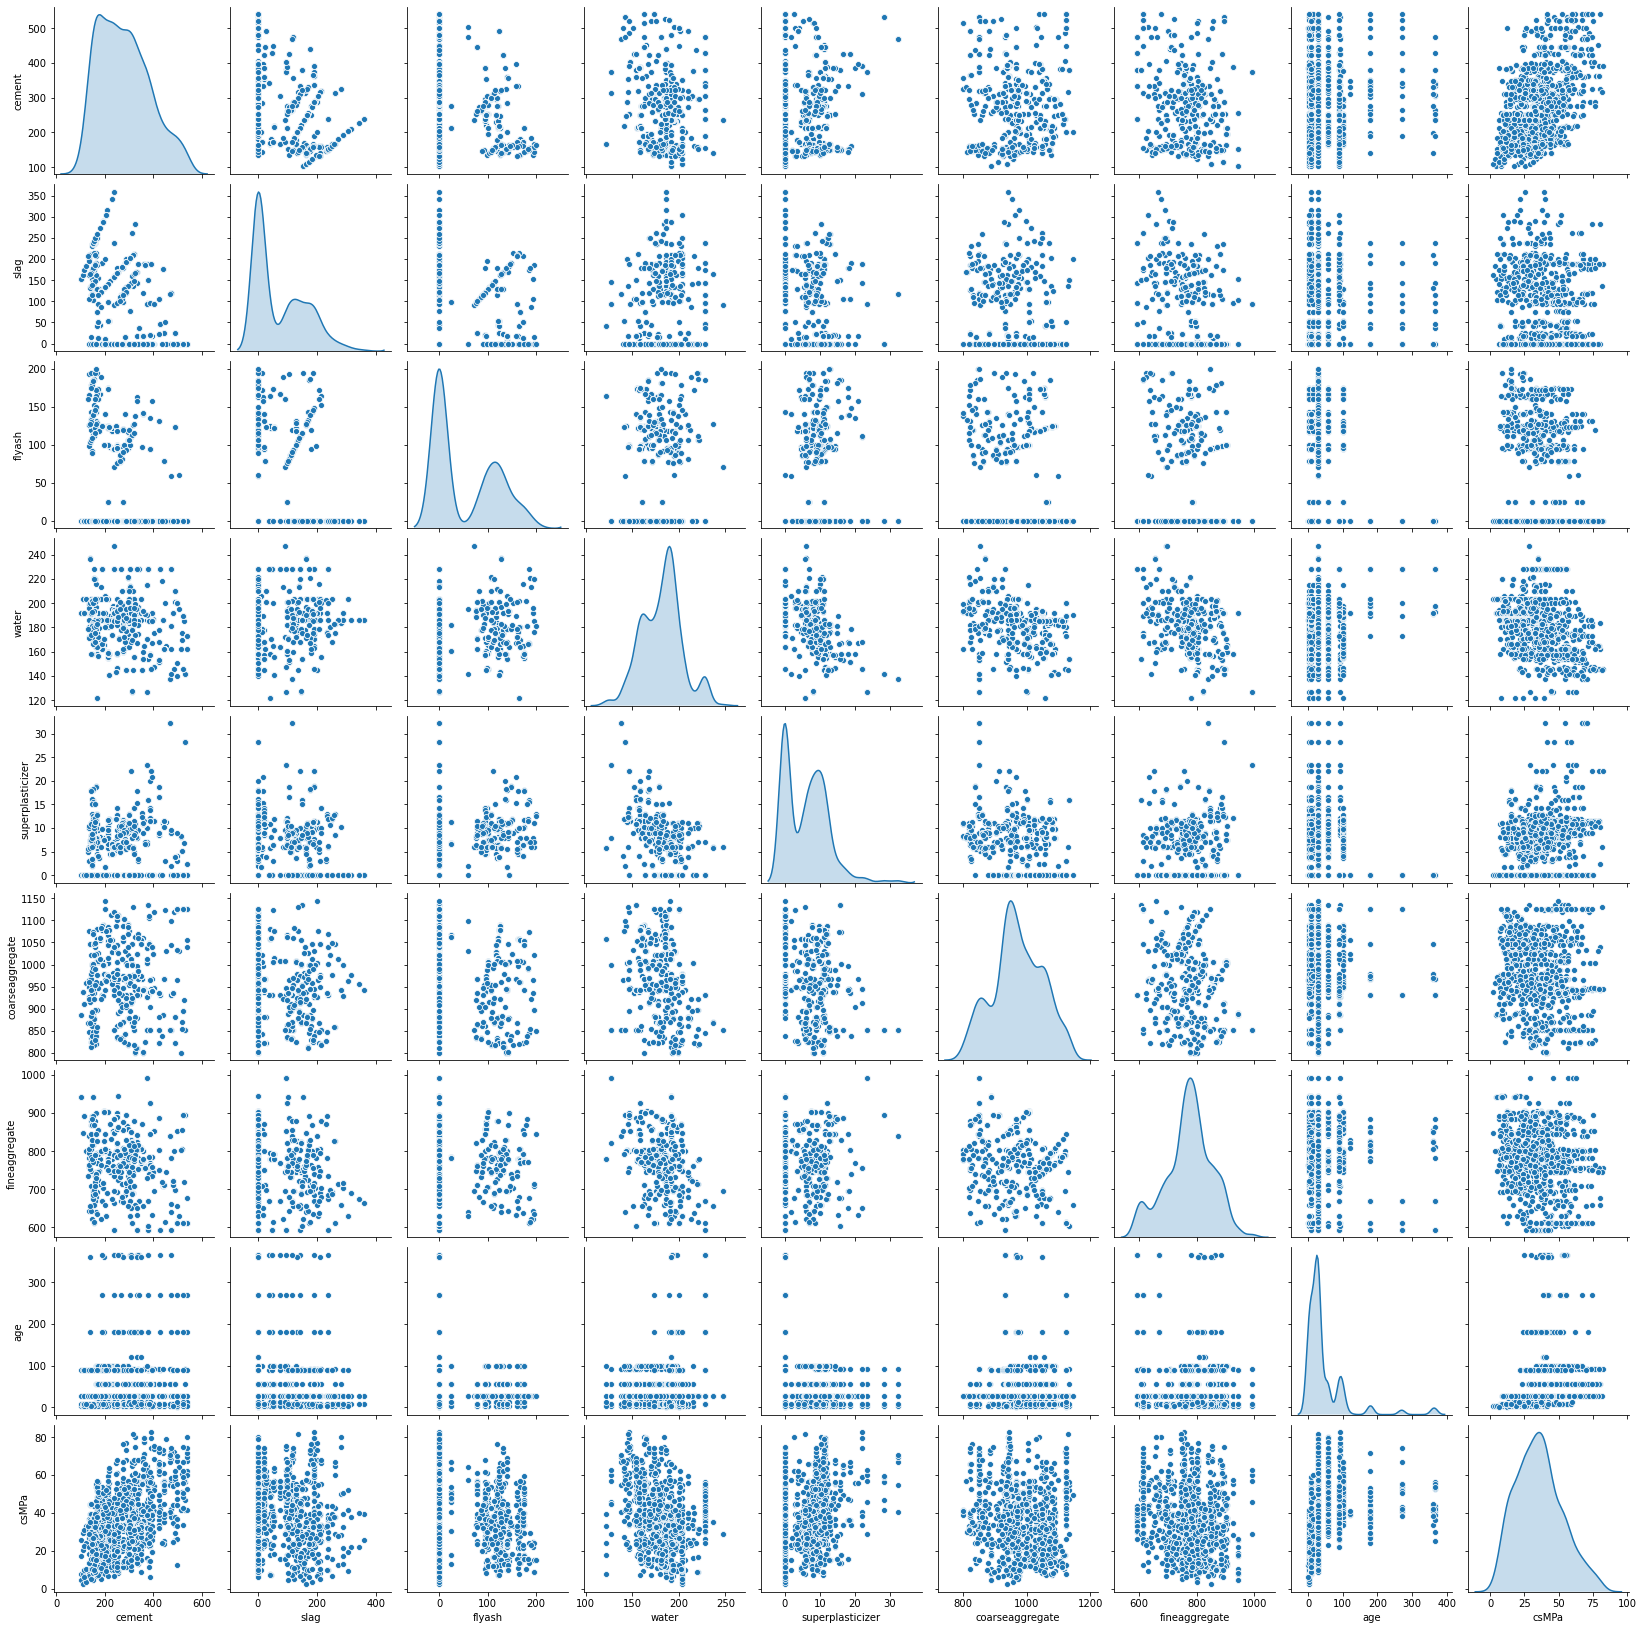

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(demo,diag_kind='kde')

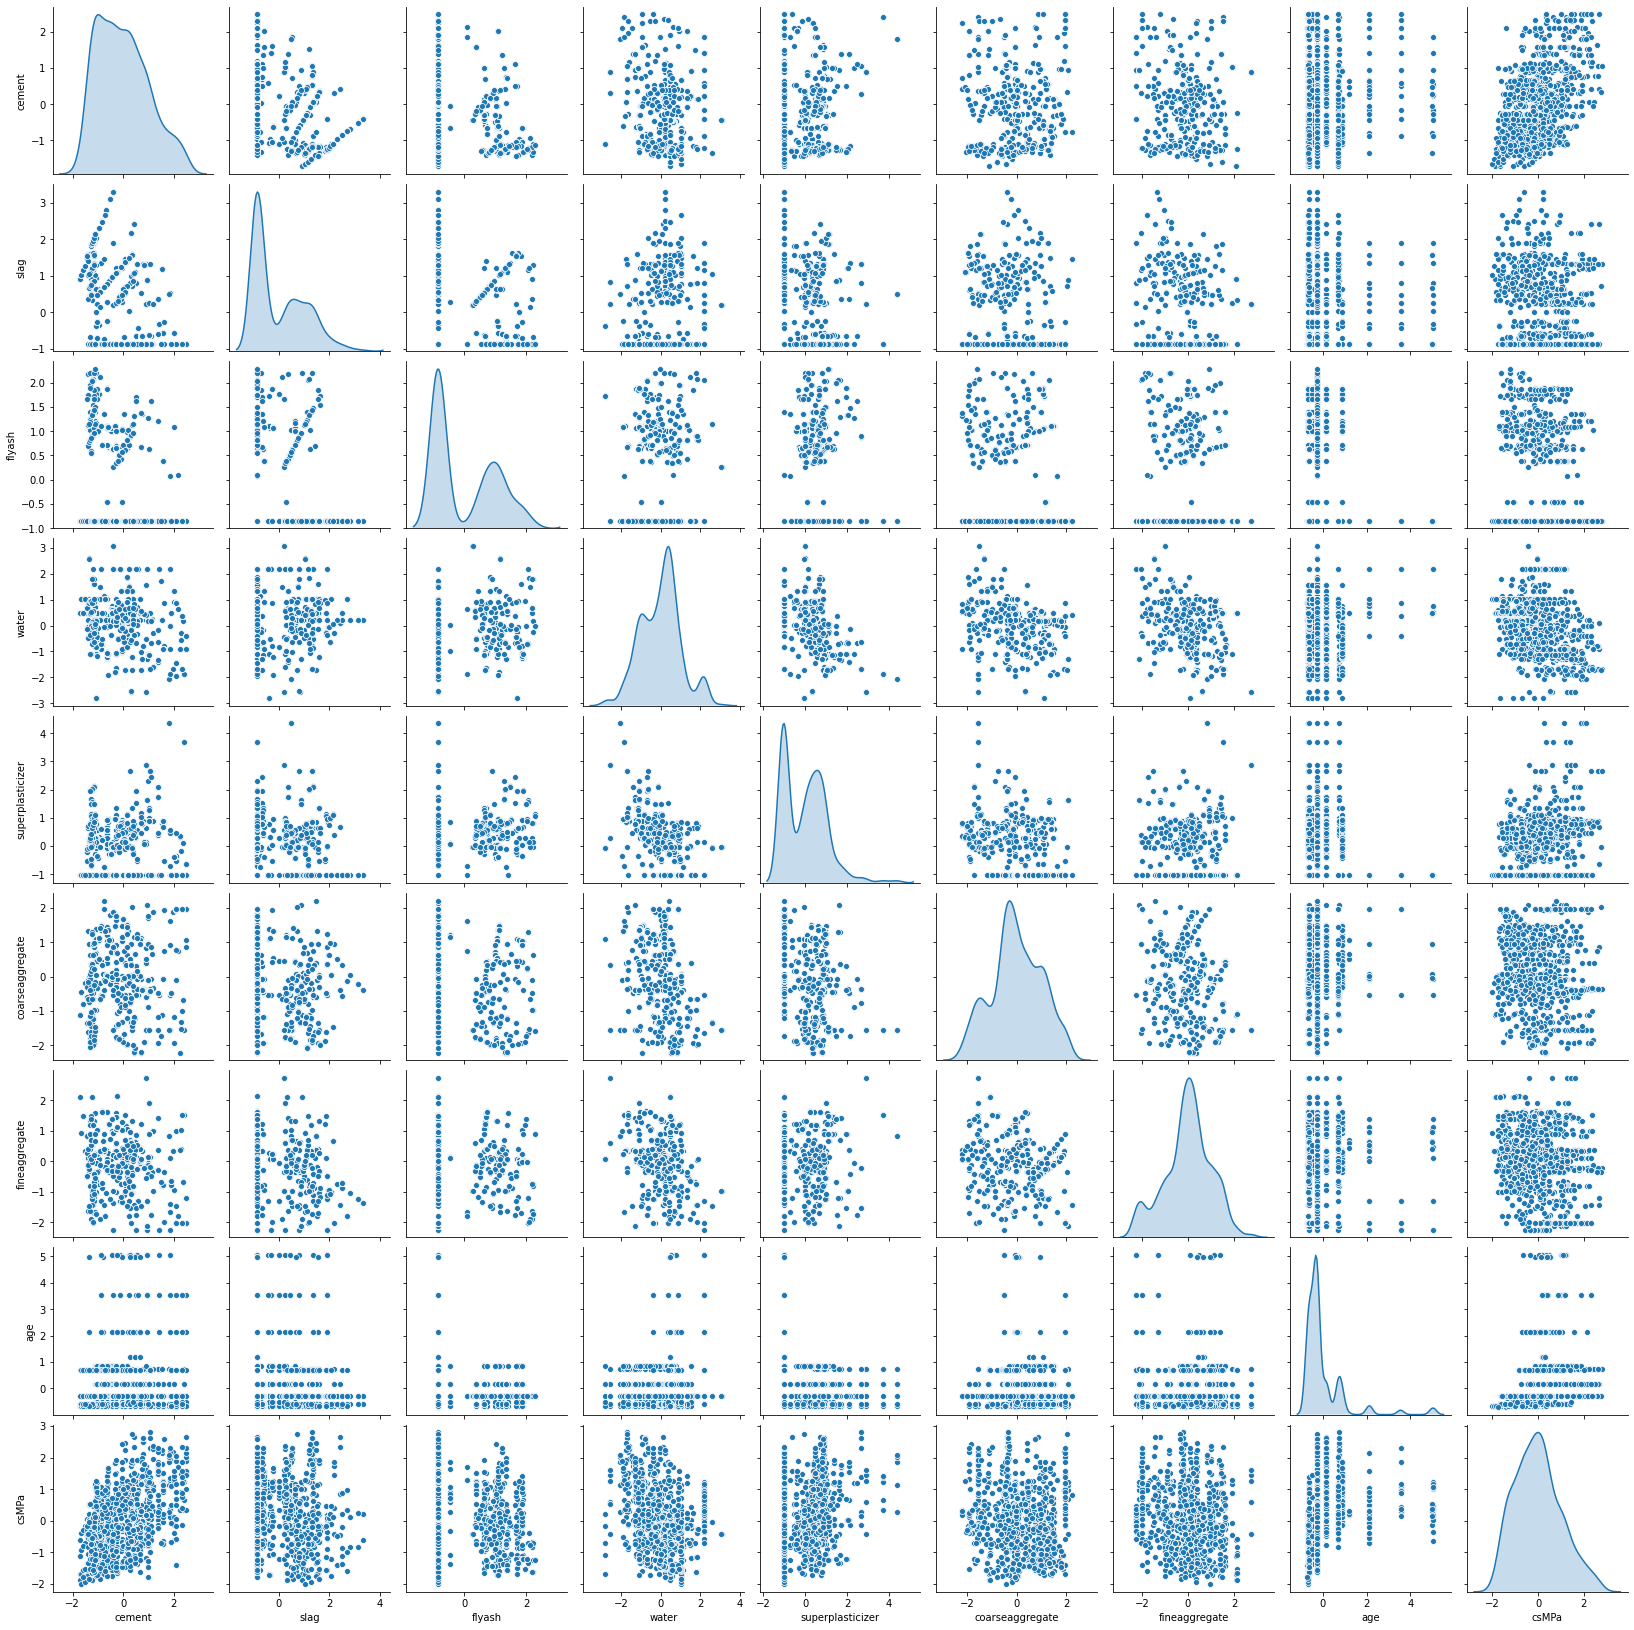

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaleddemo = pd.DataFrame(sc.fit_transform(demo))
scaleddemo.columns = demo.columns
sns.pairplot(scaleddemo,diag_kind='kde')

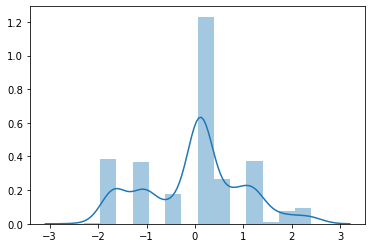

In [6]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedage = pt.fit_transform(demo[['age']])
#sns.distplot(demo['age'])
sns.distplot(transformedage)

In [7]:
powerdemo = pd.DataFrame(pt.fit_transform(demo))
powerdemo.columns = demo.columns
powerdemo.head()

cement      slag    flyash     water  superplasticizer  coarseaggregate  \
0  1.994342 -1.057530 -0.902763 -0.914487         -0.327700         0.862160   
1  1.994342 -1.057530 -0.902763 -0.914487         -0.327700         1.057114   
2  0.607415  1.001476 -0.902763  2.136453         -1.225815        -0.530500   
3  0.607415  1.001476 -0.902763  2.136453         -1.225815        -0.530500   
4 -0.744998  0.969970 -0.902763  0.496978         -1.225815         0.065405   

   fineaggregate       age     csMPa  
0      -1.208485  0.111732  2.241567  
1      -1.208485  0.111732  1.449245  
2      -2.085749  2.129725  0.357062  
3      -2.085749  2.401692  0.400283  
4       0.629012  2.389241  0.576733

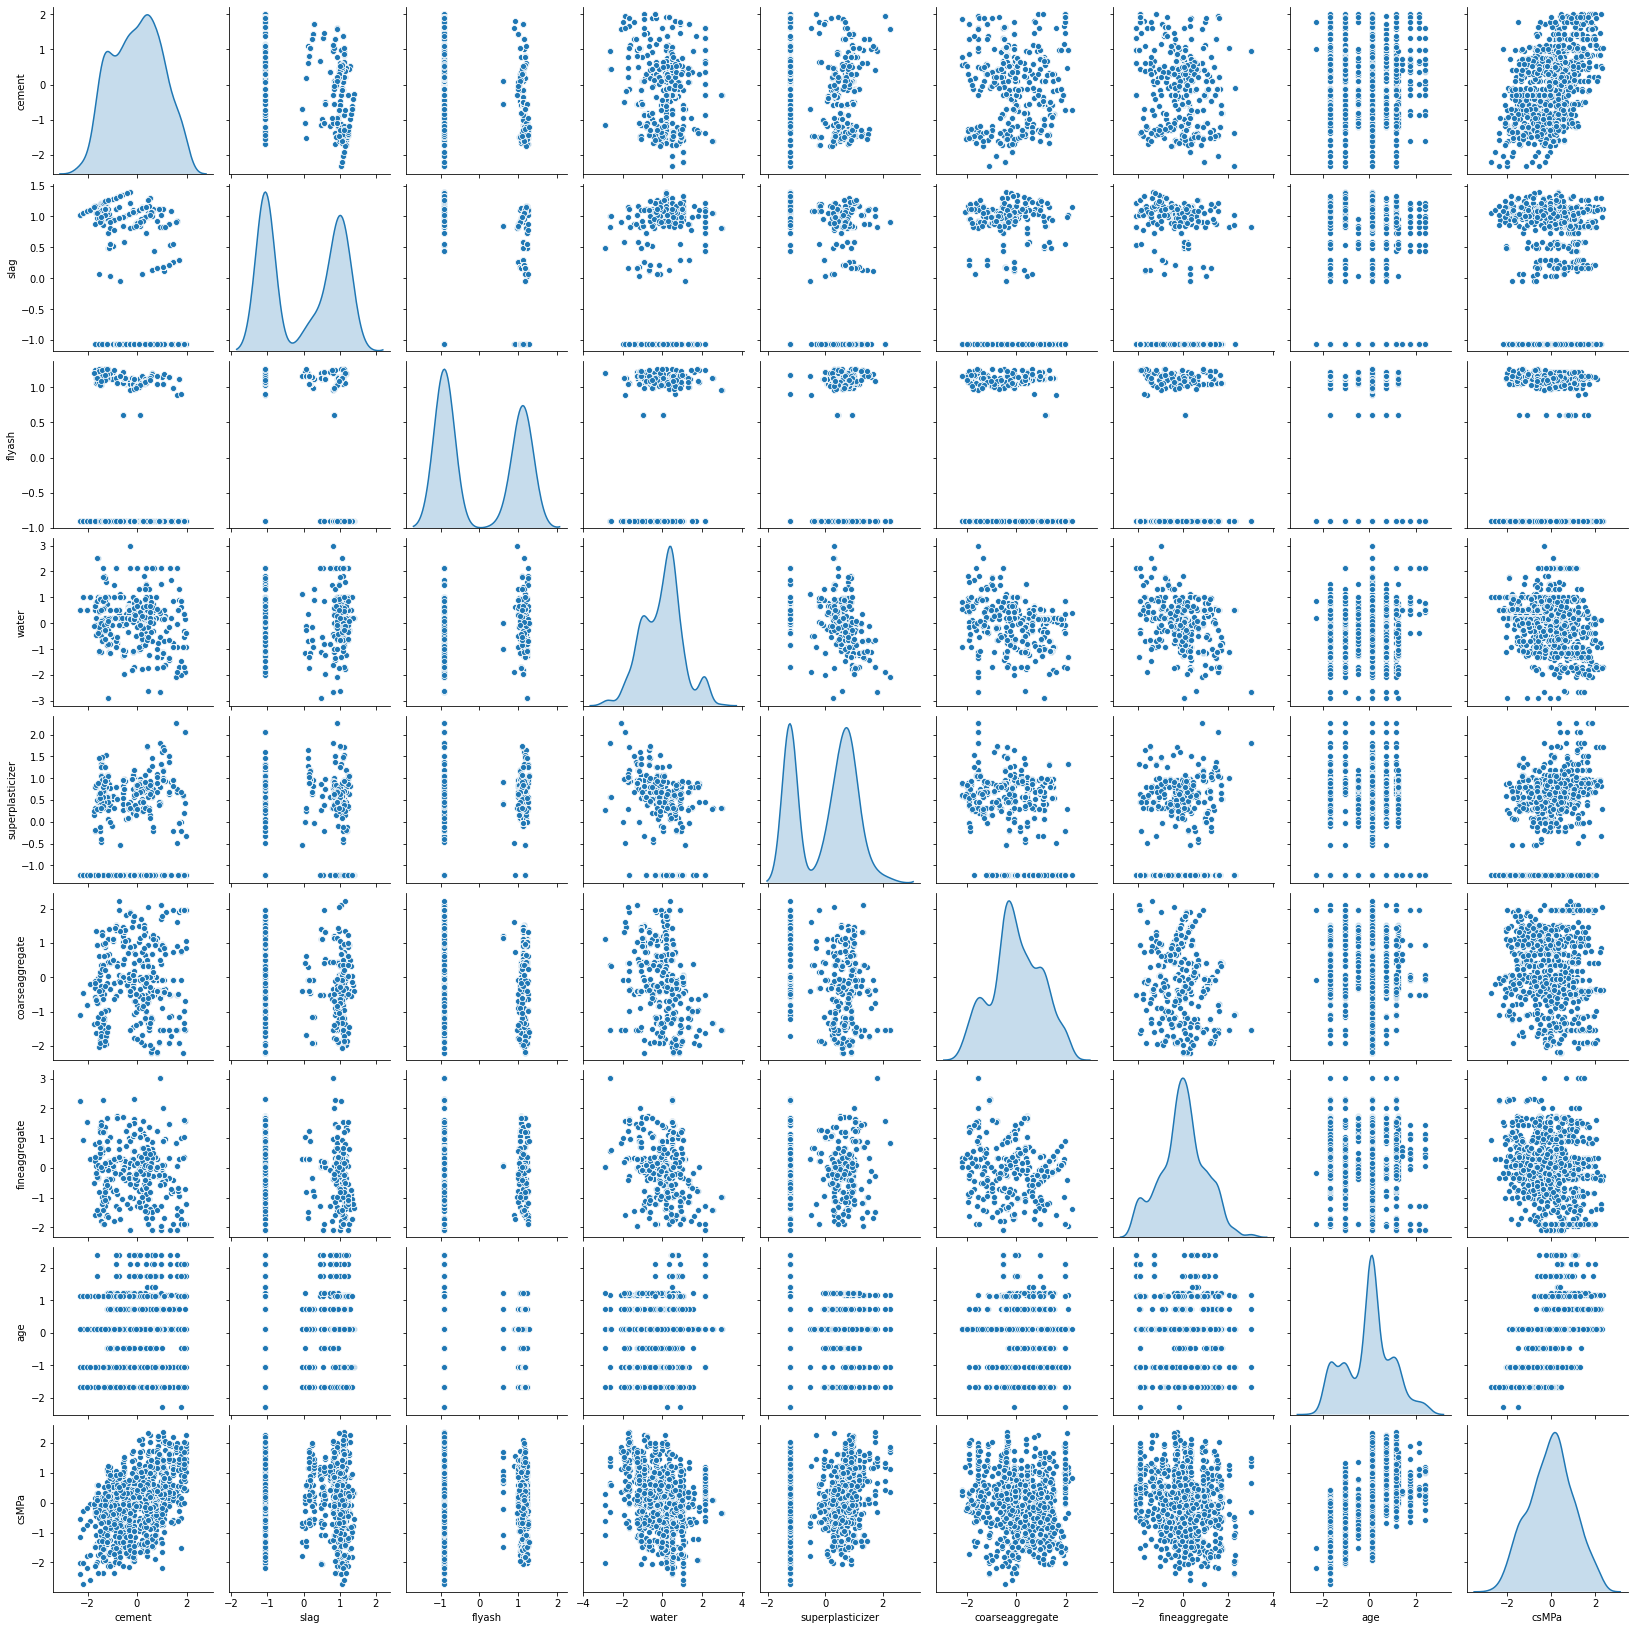

In [8]:
sns.pairplot(powerdemo,diag_kind='kde')

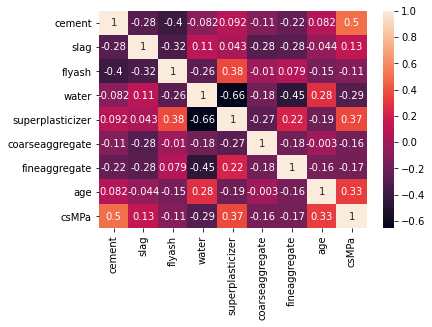

In [9]:
sns.heatmap(demo.corr(),annot=True)

In [10]:
#pip install pandas_profiling

In [11]:
import pandas as pd
from pandas_profiling import ProfileReport
design_report = ProfileReport(demo)
design_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
#pip install sweetviz

In [13]:
import sweetviz as sv
sweet_report = sv.analyze(demo)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
#pip install autoviz

Note: you may need to restart the kernel to use updated packages.


In [18]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (1030, 9)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
 

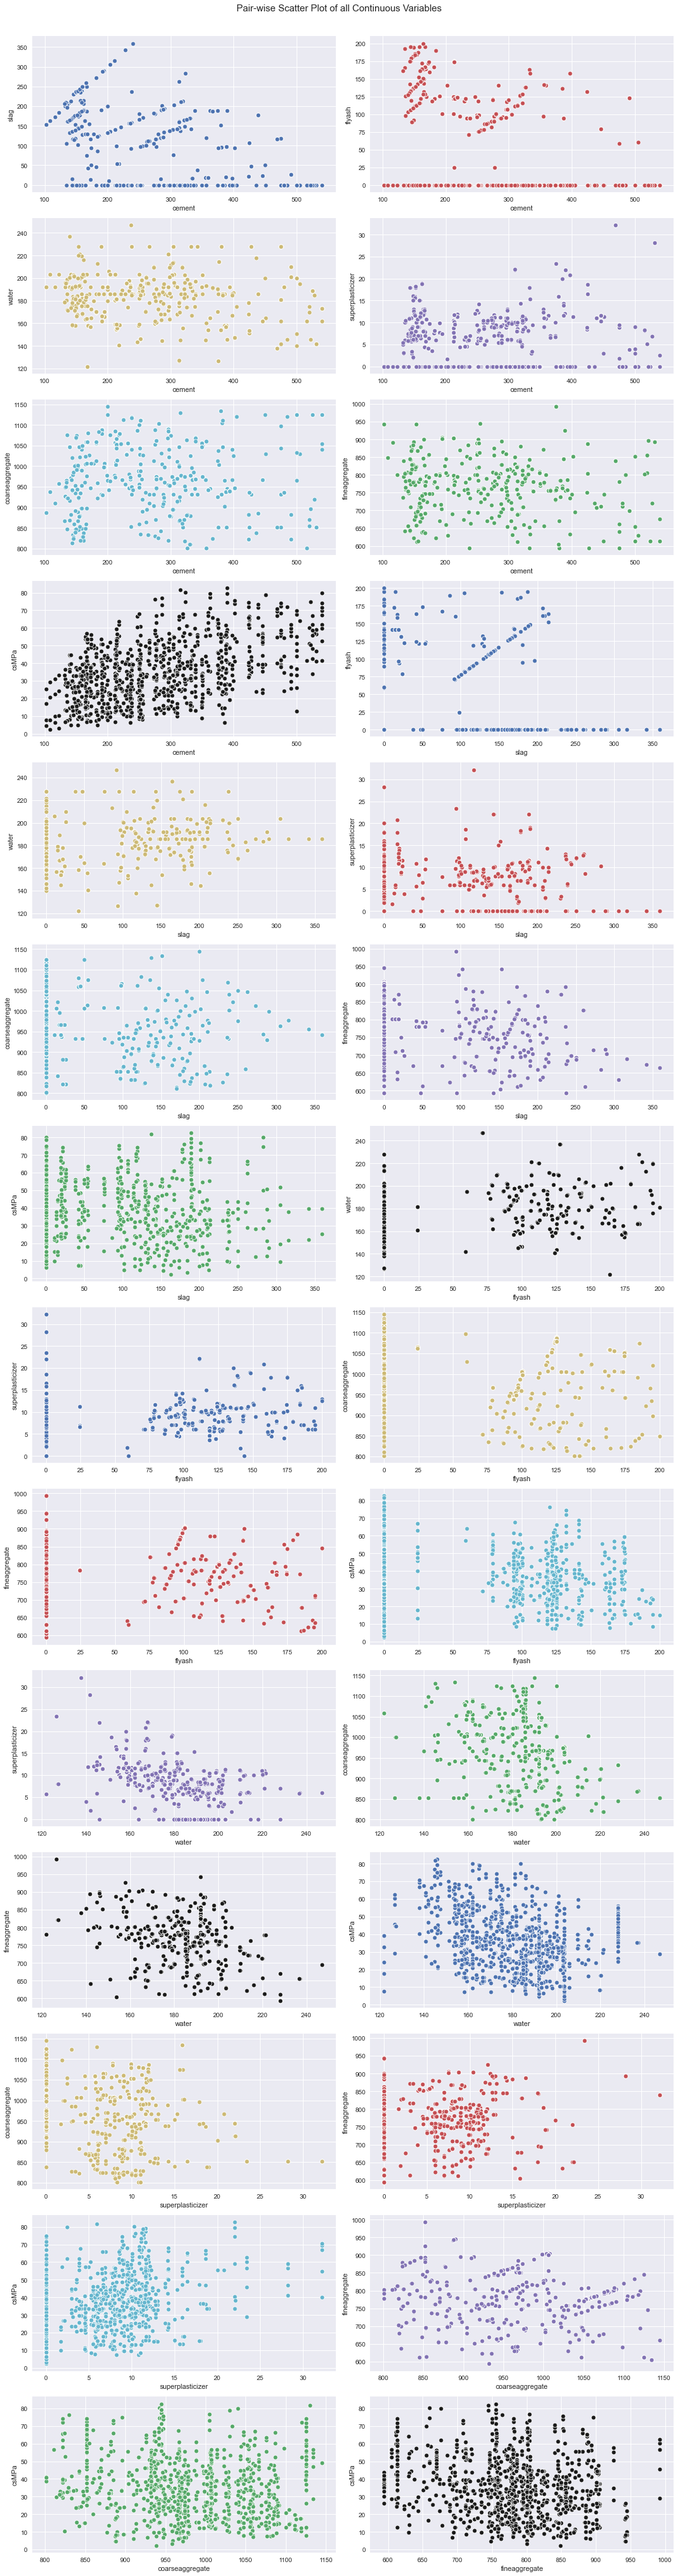

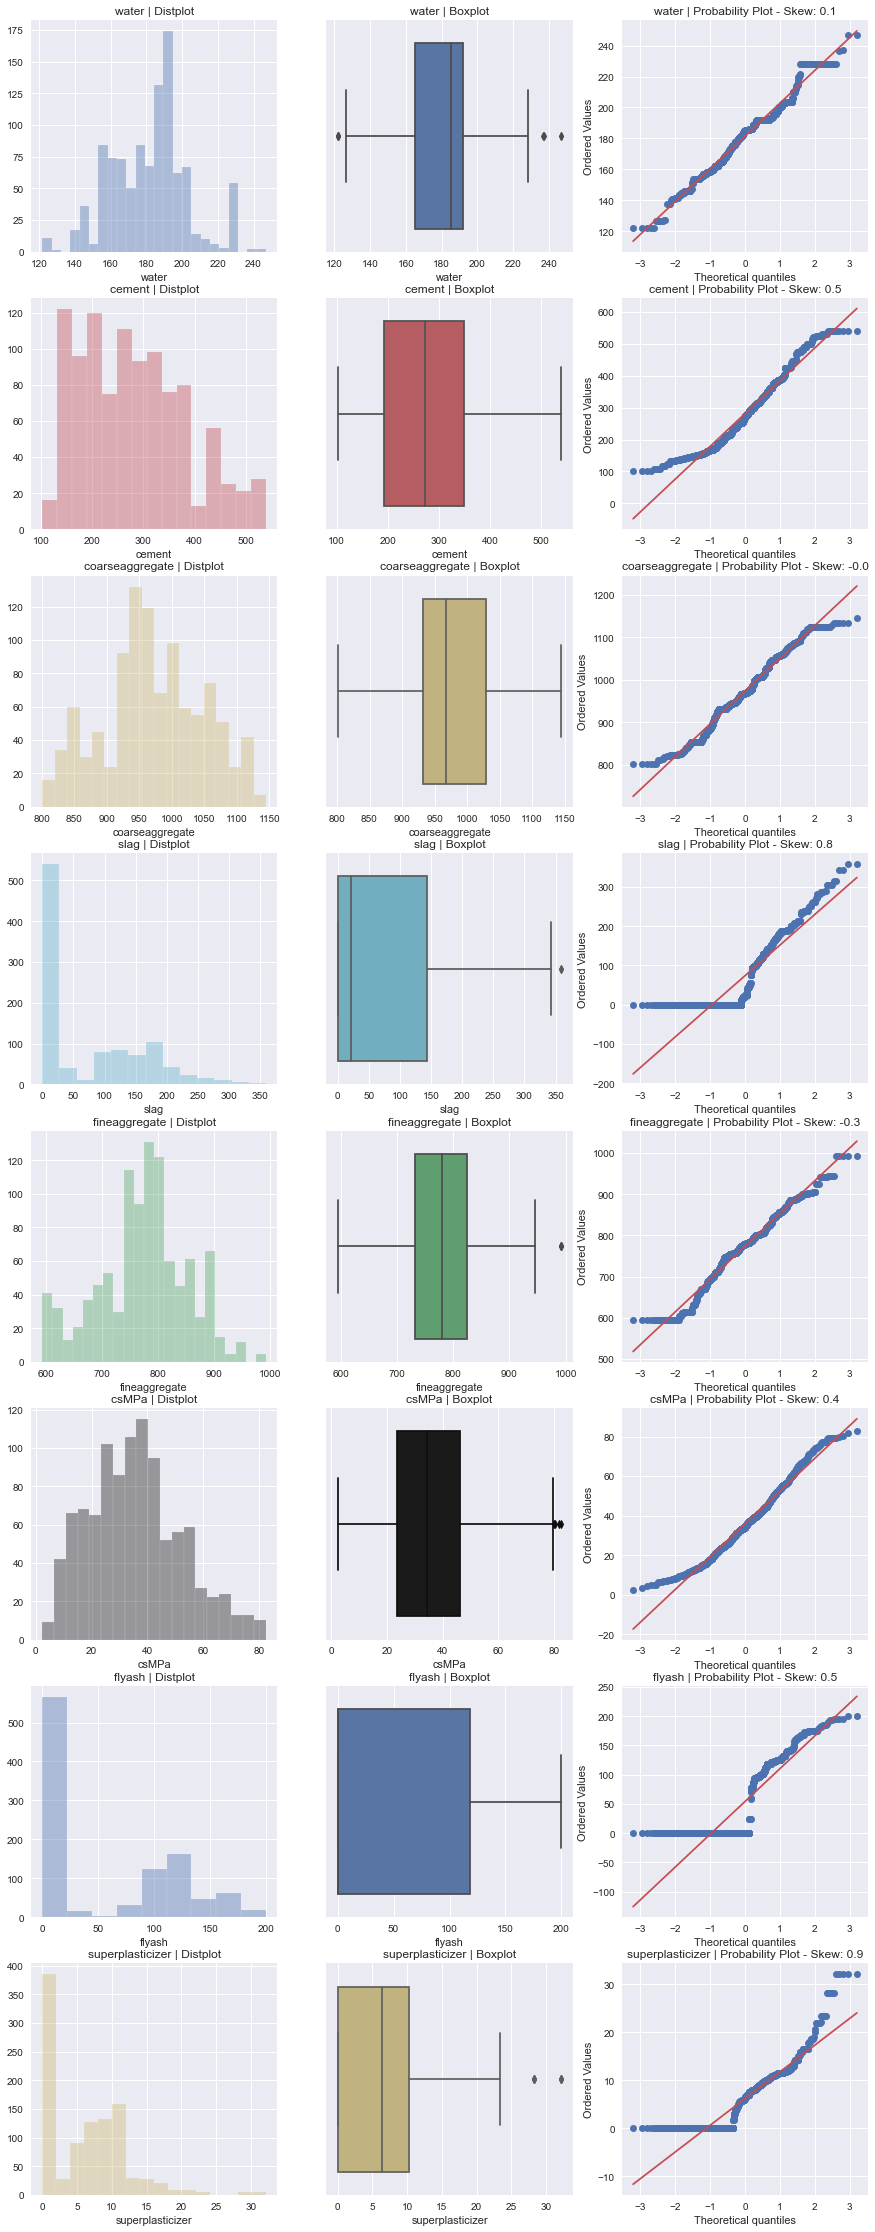

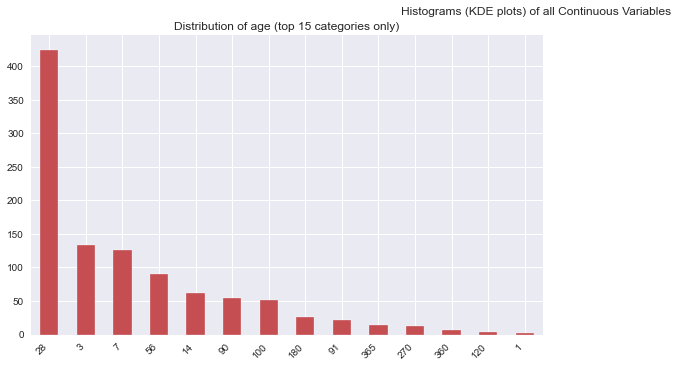

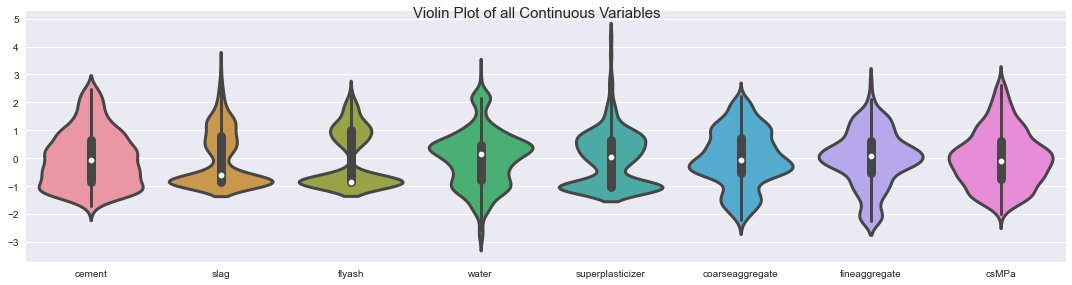

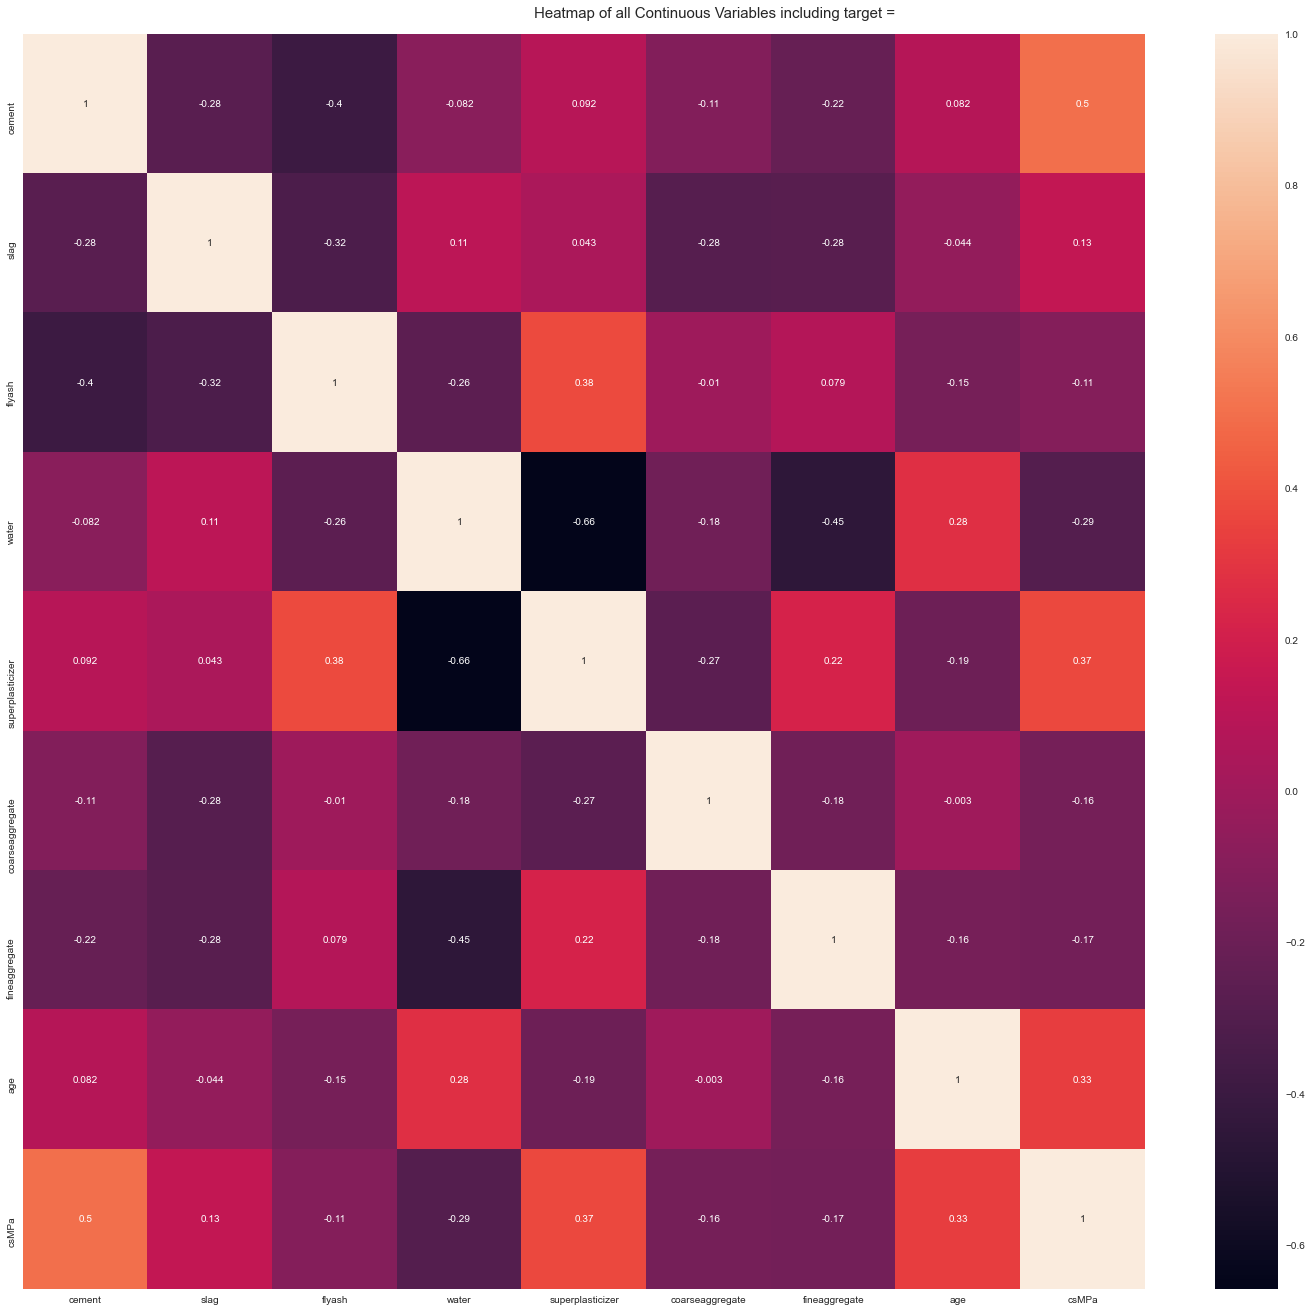

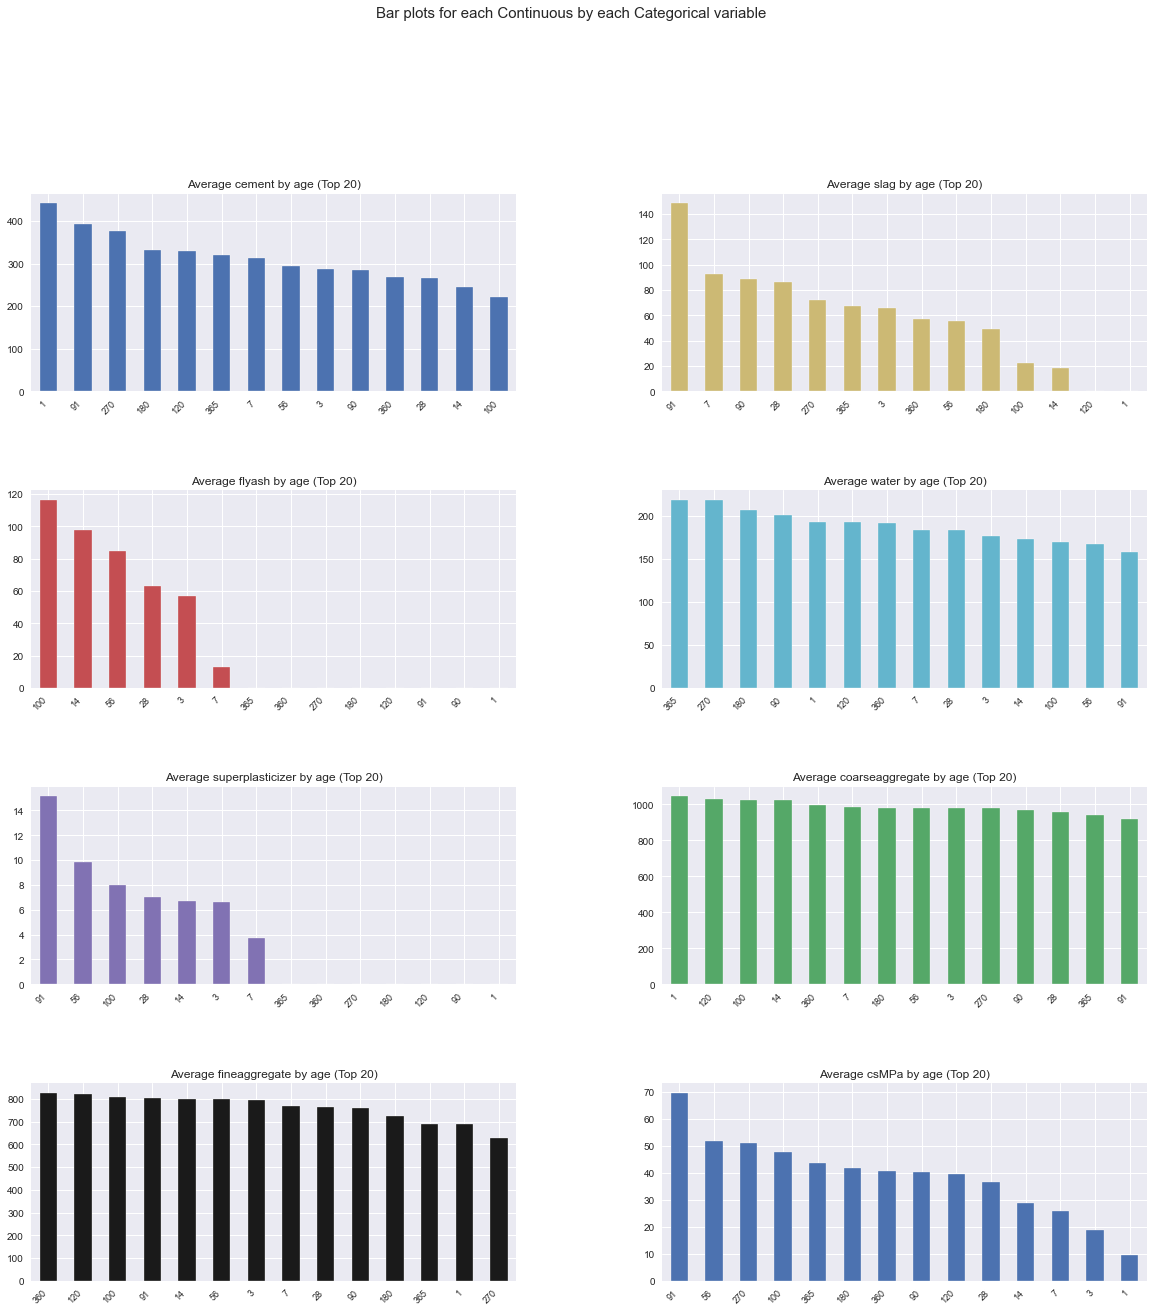

Time to run AutoViz (in seconds) = 18.282

 ###################### VISUALIZATION Completed ########################


In [19]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('Concrete_Data_Yeh.csv')

In [ ]:
#pip install dtale

In [20]:
import dtale
import pandas as pd
d = dtale.show(demo)
d.open_browser()

ModuleNotFoundError: No module named 'dtale'

In [17]:
#Basic Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
X=demo.drop('csMPa',axis=1)
#X=demo[['cement','age','water']]
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

Training R2
0.6210697467843866
Testing R2
0.5911879648718986


In [18]:
X.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  
0          676.0   28  
1          676.0   28  
2          594.0  270  
3          594.0  365  
4          825.5  360

In [19]:
lr.coef_

array([[ 0.12226049,  0.10551064,  0.09218552, -0.15212926,  0.25469802,
         0.02128236,  0.02197247,  0.11598932]])

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
sc=StandardScaler()
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
lr = LinearRegression()
lr.fit(scaledXtrain,ytrain)
print("Training R2")
print(lr.score(scaledXtrain,ytrain))
print("Testing R2")
print(lr.score(scaledXtest,ytest))

Training R2
0.6210697467843866
Testing R2
0.5911879648718985


In [23]:
lr.coef_

array([[12.88715568,  9.08366371,  5.95002136, -3.29482537,  1.54318323,
         1.65154057,  1.78122932,  7.35870478]])

In [28]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
#("sc",StandardScaler()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.6210697467843866
Testing R2
0.5911879648718986
[0.71979944 0.55030814 0.62680426 0.35784287 0.60852661 0.64955735
 0.60723933 0.74942929 0.55857665 0.56769243]
Average R2
0.5995776369504163


In [29]:
pipe['lr'].coef_

array([[ 0.12226049,  0.10551064,  0.09218552, -0.15212926,  0.25469802,
         0.02128236,  0.02197247,  0.11598932]])

In [31]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.8080840977706969
Testing R2
0.7997646551542748
[0.82406782 0.82312497 0.77916128 0.67511077 0.78006356 0.76090952
 0.80278288 0.87637862 0.82497253 0.80589979]
Average R2
0.7952471755402373


In [40]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
#("pt",PowerTransformer()),
("lr", DecisionTreeRegressor(max_depth=20,random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9954771058602125
Testing R2
0.8873504651810675
[0.87270311 0.93541957 0.88945441 0.49956867 0.87014447 0.85022706
 0.79655319 0.90082183 0.82953237 0.84606649]
Average R2
0.8290491173392207


In [43]:
#With Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("lr", RandomForestRegressor(n_estimators=500,random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9847205048727171
Testing R2
0.9221437639066316
[0.90602501 0.9304801  0.91706429 0.74003106 0.91698764 0.90004744
 0.90246633 0.92852769 0.91434303 0.90646548]
Average R2
0.8962438049958695


Automatically created module for IPython interactive environment


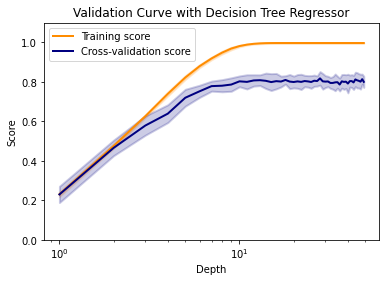

In [51]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), Xtrain, ytrain, param_name="max_depth", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Regressor")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


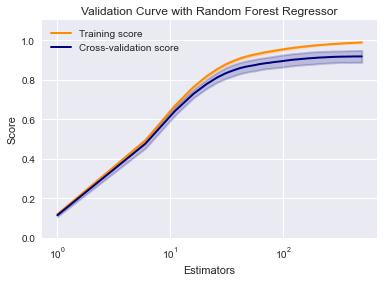

In [33]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,500,5)
train_scores, test_scores = validation_curve(
    RandomForestRegressor(), Xtrain, ytrain, param_name="n_estimators", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Regressor")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [44]:
import warnings
warnings.filterwarnings('ignore')
#Model Comparison
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
lr = LinearRegression()
dt = DecisionTreeRegressor()
xb = RandomForestRegressor(n_estimators=1000)
models = []
models.append(('Linear Regression',lr))
models.append(('Decision Tree Regression',dt))
models.append(('Random Forest Regression',xb))

Linear Regression: 0.607883 (0.101906)
Decision Tree Regression: 0.855981 (0.097254)
Random Forest Regression: 0.913828 (0.053192)


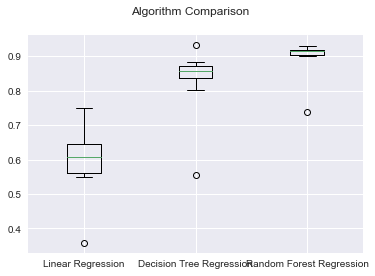

In [46]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:
results

[array([0.71979944, 0.55030814, 0.62680426, 0.35784287, 0.60852661,
        0.64955735, 0.60723933, 0.74942929, 0.55857665, 0.56769243]),
 array([0.8665584 , 0.93199526, 0.87441476, 0.55528542, 0.86176535,
        0.84424115, 0.80193306, 0.88442035, 0.83625113, 0.85019684]),
 array([0.90901862, 0.92985624, 0.9153702 , 0.73903879, 0.91683108,
        0.8995644 , 0.90074725, 0.92419878, 0.91692603, 0.91228616])]